In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

### Cloud data just numbers

### See what values there is 

In [ ]:
def fill_the_future(df, changes_tuple, years=50):

    prediction_data = pd.DataFrame()
    # Take the last year (2023) from df and make it new df
    last_year = df[df['Date'].dt.year == 2023]
    # Columns we want to fill
    last_year = last_year[["Date","Average temperature [°C]", "Average radiation", "Cloud cover [1/8]"]]

    num_years = years
    # Iterate over each year
    for i in range(1, num_years + 1):

        # Adjust temperature for each year
        temperature_adjustment = daily_changes_levi[2] * i  # Increase by 0.5 Celsius for each subsequent year
        radiation_adjustment = daily_changes_levi[1] * i
        cloud_adjustment = daily_changes_levi[0] * i
        # Create additional data for the current year with adjusted temperature
        new_date = last_year['Date'] + pd.DateOffset(years=i)
        new_temp = last_year["Average temperature [°C]"].astype(float) + temperature_adjustment
        new_rad = last_year["Average radiation"].astype(float) + radiation_adjustment
        new_cloud = last_year["Cloud cover [1/8]"].astype(float) + cloud_adjustment

        date_df = pd.DataFrame(new_date)
        temp_df = pd.DataFrame(new_temp)
        rad_df = pd.DataFrame(new_rad)
        cloud_df = pd.DataFrame(new_cloud)

        result = pd.merge(date_df, temp_df, left_index=True, right_index=True)
        result = pd.merge(result, rad_df, left_index=True, right_index=True)
        result = pd.merge(result, cloud_df, left_index=True, right_index=True)

        prediction_data = pd.concat([prediction_data, result], ignore_index=True)

    return prediction_data


# prediction_data.to_csv("levi_50v_selittävät_muuttujat_ennustus.csv")
# future_levi = levi_df.copy()
# years_to_fill=50
# future_levi = fill_the_future(future_levi, daily_changes_levi, years_to_fill)
# future_levi


In [3]:
# HIMOS
himos_df = pd.read_csv("C:\\Code\\Miniproject 2\\combined data\\himos.csv", parse_dates=['Date'])
unique_values = himos_df['Cloud cover [1/8]'].unique()

# KOLI
koli_df = pd.read_csv("C:\\Code\\Miniproject 2\\combined data\\koli.csv", parse_dates=['Date'])

# LEVI
levi_df = pd.read_csv("C:\\Code\\Miniproject 2\\combined data\\levi.csv", parse_dates=['Date'])

# MESSILA
messila_df = pd.read_csv("C:\\Code\\Miniproject 2\\combined data\\messila.csv", parse_dates=['Date'])

# PEURAMAA
peuramaa_df = pd.read_csv("C:\\Code\\Miniproject 2\\combined data\\peuramaa.csv", parse_dates=['Date'])

# PYHA
pyha_df = pd.read_csv("C:\\Code\\Miniproject 2\\combined data\\pyha.csv", parse_dates=['Date'])

# RUKA
ruka_df = pd.read_csv("C:\\Code\\Miniproject 2\\combined data\\ruka.csv", parse_dates=['Date'])

# SAARISELKA
saariselka_df = pd.read_csv("C:\\Code\\Miniproject 2\\combined data\\saariselka.csv", parse_dates=['Date'])

# TAHKO
tahko_df = pd.read_csv("C:\\Code\\Miniproject 2\\combined data\\tahko.csv", parse_dates=['Date'])

# VUOKATTI
vuokatti_df = pd.read_csv("C:\\Code\\Miniproject 2\\combined data\\vuokatti.csv", parse_dates=['Date'])


# print(unique_values)
peuramaa_df

,Cloud cover [1/8],Date,Snow depth [cm],Unnamed: 0,Average temperature [°C],latitude,longitude,Average radiation
0,Mostly cloudy (7/8),2004-01-01,NaN,0,-7.2,60.102686,24.464341,63.400000
1,Clear (0/8),2004-01-02,0.0,1,-11.9,60.102686,24.464341,65.666667
2,Clear (0/8),2004-01-03,0.0,2,-10.2,60.102686,24.464341,54.566667
3,Clear (1/8),2004-01-04,0.0,3,-4.4,60.102686,24.464341,4.500000
4,Cloudy (8/8),2004-01-05,NaN,4,-3.2,60.102686,24.464341,3.466667
...,...,...,...,...,...,...,...,...
7301,Cloudy (8/8),2023-12-28,21.0,7301,-0.7,60.102686,24.464341,6.931169
7302,Cloudy (8/8),2023-12-29,20.0,7302,0.5,60.102686,24.464341,3.621587
7303,Cloudy (8/8),2023-12-30,29.0,7303,-3.0,60.102686,24.464341,0.744444
7304,Cloudy (8/8),2023-12-31,28.0,7304,-13.3,60.102686,24.464341,3.164127


### Combine to 5 training sets and one test set and 4 future predictions

In [4]:
training_df = pd.concat([saariselka_df, pyha_df, himos_df, peuramaa_df])
test_df = vuokatti_df
prediction_df = pd.concat([levi_df, ruka_df, koli_df, tahko_df, messila_df])

In [5]:
training_df

,Cloud cover [1/8],Date,Snow depth [cm],Unnamed: 0,Average temperature [°C],latitude,longitude,Average radiation
0,Clear (0/8),2004-01-01,40,0.0,-21.8,68.425135,27.449662,63.400000
1,Mostly cloudy (7/8),2004-01-02,40,1.0,-22.2,68.425135,27.449662,65.666667
2,Mostly cloudy (7/8),2004-01-03,40,2.0,-20.6,68.425135,27.449662,54.566667
3,Cloudy (8/8),2004-01-04,40,3.0,-16.1,68.425135,27.449662,4.500000
4,Cloudy (8/8),2004-01-05,40,4.0,-15.5,68.425135,27.449662,3.466667
...,...,...,...,...,...,...,...,...
7301,Cloudy (8/8),2023-12-28,21.0,7301.0,-0.7,60.102686,24.464341,6.931169
7302,Cloudy (8/8),2023-12-29,20.0,7302.0,0.5,60.102686,24.464341,3.621587
7303,Cloudy (8/8),2023-12-30,29.0,7303.0,-3.0,60.102686,24.464341,0.744444
7304,Cloudy (8/8),2023-12-31,28.0,7304.0,-13.3,60.102686,24.464341,3.164127


In [6]:
prediction_df

,Cloud cover [1/8],Date,Snow depth [cm],Unnamed: 0,Average temperature [°C],latitude,longitude,Average radiation
0,Clear (0/8),2004-01-01,39,0.0,-27.3,67.785461,24.856284,63.400000
1,Mostly cloudy (7/8),2004-01-02,39,1.0,-30,67.785461,24.856284,65.666667
2,Mostly cloudy (7/8),2004-01-03,39,2.0,-20.5,67.785461,24.856284,54.566667
3,Cloudy (8/8),2004-01-04,40,3.0,-15.2,67.785461,24.856284,4.500000
4,Cloudy (8/8),2004-01-05,40,4.0,-19.3,67.785461,24.856284,3.466667
...,...,...,...,...,...,...,...,...
7302,Cloudy (8/8),2023-12-28,27,1952.0,-4.1,61.013791,25.558544,6.931169
7303,Cloudy (8/8),2023-12-29,28,1953.0,-3.3,61.013791,25.558544,3.621587
7304,Cloudy (8/8),2023-12-30,32,1954.0,-6.5,61.013791,25.558544,0.744444
7305,Mostly cloudy (6/8),2023-12-31,30,1955.0,-14.7,61.013791,25.558544,3.164127


In [7]:
test_df

,Cloud cover [1/8],Date,Snow depth [cm],Unnamed: 0,Average temperature [°C],latitude,longitude,Average radiation
0,Clear (0/8),2004-01-01,31,0.0,-24.9,64.139453,28.287481,63.400000
1,Clear (1/8),2004-01-02,31,1.0,-19.2,64.139453,28.287481,65.666667
2,Cloudy (8/8),2004-01-03,31,2.0,-13,64.139453,28.287481,54.566667
3,Cloudy (8/8),2004-01-04,32,3.0,-13.9,64.139453,28.287481,4.500000
4,Cloudy (8/8),2004-01-05,32,4.0,-13.5,64.139453,28.287481,3.466667
...,...,...,...,...,...,...,...,...
7301,Cloudy (8/8),2023-12-28,44,7282.0,-7.2,64.139453,28.287481,6.931169
7302,Cloudy (8/8),2023-12-29,44,7283.0,-10,64.139453,28.287481,3.621587
7303,Mostly clear (2/8),2023-12-30,43,7284.0,-12.6,64.139453,28.287481,0.744444
7304,Clear (0/8),2023-12-31,43,7285.0,-12.9,64.139453,28.287481,3.164127


## Sort dataframe by date

In [71]:
dataframes = [levi_df, ruka_df, koli_df, tahko_df, messila_df]
for dataframe in dataframes:
    dataframe.sort_values(by='Date', inplace=True)

In [8]:
# TEST
test_df.sort_values(by='Date', inplace=True)
# PREDICTION
prediction_df.sort_values(by='Date', inplace=True)
# Train
training_df.sort_values(by='Date', inplace=True)

training_df


,Cloud cover [1/8],Date,Snow depth [cm],Unnamed: 0,Average temperature [°C],latitude,longitude,Average radiation
0,Clear (0/8),2004-01-01,40,0.0,-21.8,68.425135,27.449662,63.400000
0,Mostly cloudy (7/8),2004-01-01,NaN,0.0,-7.2,60.102686,24.464341,63.400000
0,Cloudy (8/8),2004-01-01,15,0.0,-17.2,61.879612,25.299437,63.400000
0,Cloudy (8/8),2004-01-01,25.0,0.0,-29.6,67.014257,27.149530,63.400000
1,Clear (0/8),2004-01-02,0.0,1.0,-11.9,60.102686,24.464341,65.666667
...,...,...,...,...,...,...,...,...
7304,Partly cloudy (4/8),2023-12-31,58,7304.0,-12.9,68.425135,27.449662,3.164127
7305,Clear (0/8),2024-01-01,56.0,7305.0,-23.9,67.014257,27.149530,7.247213
7305,Cloudy (8/8),2024-01-01,58,7305.0,-17.2,68.425135,27.449662,7.247213
7305,Mostly clear (2/8),2024-01-01,27,7281.0,-22.9,61.879612,25.299437,7.247213


### Remove duplicate rows

In [72]:
dataframes = [levi_df, ruka_df, koli_df, tahko_df, messila_df]
for dataframe in dataframes:
    dataframe.drop_duplicates(inplace=True, ignore_index=True)

In [9]:
# TRAINING DF
duplicates_train = training_df.duplicated(subset='Date')
training_df[duplicates_train]

# PREDICTION DF
duplicates_pred = prediction_df.duplicated(subset='Date')
prediction_df[duplicates_pred]

# TESTING DF
duplicates_test = test_df.duplicated(subset='Date')
test_df[duplicates_test]


,Cloud cover [1/8],Date,Snow depth [cm],Unnamed: 0,Average temperature [°C],latitude,longitude,Average radiation


In [10]:
# Start removing duplicate rows from datasets

training_df.drop_duplicates(inplace=True, ignore_index=True)

prediction_df.drop_duplicates(inplace=True, ignore_index=True)

test_df.drop_duplicates(inplace=True, ignore_index=True)

In [11]:
test_df

,Cloud cover [1/8],Date,Snow depth [cm],Unnamed: 0,Average temperature [°C],latitude,longitude,Average radiation
0,Clear (0/8),2004-01-01,31,0.0,-24.9,64.139453,28.287481,63.400000
1,Clear (1/8),2004-01-02,31,1.0,-19.2,64.139453,28.287481,65.666667
2,Cloudy (8/8),2004-01-03,31,2.0,-13,64.139453,28.287481,54.566667
3,Cloudy (8/8),2004-01-04,32,3.0,-13.9,64.139453,28.287481,4.500000
4,Cloudy (8/8),2004-01-05,32,4.0,-13.5,64.139453,28.287481,3.466667
...,...,...,...,...,...,...,...,...
7301,Cloudy (8/8),2023-12-28,44,7282.0,-7.2,64.139453,28.287481,6.931169
7302,Cloudy (8/8),2023-12-29,44,7283.0,-10,64.139453,28.287481,3.621587
7303,Mostly clear (2/8),2023-12-30,43,7284.0,-12.6,64.139453,28.287481,0.744444
7304,Clear (0/8),2023-12-31,43,7285.0,-12.9,64.139453,28.287481,3.164127


## Clean up cloud data that there is only numbers left

In [12]:
test_df['Cloud cover [1/8]'] = test_df['Cloud cover [1/8]'].str.extract(r'\((\d+)/')
prediction_df['Cloud cover [1/8]'] = prediction_df['Cloud cover [1/8]'].str.extract(r'\((\d+)/')
training_df['Cloud cover [1/8]'] = training_df['Cloud cover [1/8]'].str.extract(r'\((\d+)/')

In [73]:
dataframes = [levi_df, ruka_df, koli_df, tahko_df, messila_df]
for dataframe in dataframes:
    dataframe['Cloud cover [1/8]'] = dataframe['Cloud cover [1/8]'].str.extract(r'\((\d+)/')

In [13]:
training_df

,Cloud cover [1/8],Date,Snow depth [cm],Unnamed: 0,Average temperature [°C],latitude,longitude,Average radiation
0,0,2004-01-01,40,0.0,-21.8,68.425135,27.449662,63.400000
1,7,2004-01-01,NaN,0.0,-7.2,60.102686,24.464341,63.400000
2,8,2004-01-01,15,0.0,-17.2,61.879612,25.299437,63.400000
3,8,2004-01-01,25.0,0.0,-29.6,67.014257,27.149530,63.400000
4,0,2004-01-02,0.0,1.0,-11.9,60.102686,24.464341,65.666667
...,...,...,...,...,...,...,...,...
29219,4,2023-12-31,58,7304.0,-12.9,68.425135,27.449662,3.164127
29220,0,2024-01-01,56.0,7305.0,-23.9,67.014257,27.149530,7.247213
29221,8,2024-01-01,58,7305.0,-17.2,68.425135,27.449662,7.247213
29222,2,2024-01-01,27,7281.0,-22.9,61.879612,25.299437,7.247213


### Drop unnamed column

In [14]:
test_df = test_df.drop('Unnamed: 0',axis=1)
training_df = training_df.drop('Unnamed: 0',axis=1)
prediction_df = prediction_df.drop('Unnamed: 0',axis=1)


In [89]:
messila_df

,Cloud cover [1/8],Date,Snow depth [cm],Unnamed: 0,Average temperature [°C],latitude,longitude,Average radiation
0,8,2004-01-01,10,0.0,-10.4,61.013791,25.558544,63.400000
1,0,2004-01-02,8,1.0,-16.0,61.013791,25.558544,65.666667
2,0,2004-01-03,8,2.0,-20.9,61.013791,25.558544,54.566667
3,8,2004-01-04,8,3.0,-8.8,61.013791,25.558544,4.500000
4,7,2004-01-05,9,4.0,-6.9,61.013791,25.558544,3.466667
...,...,...,...,...,...,...,...,...
7302,8,2023-12-28,27,1952.0,-4.1,61.013791,25.558544,6.931169
7303,8,2023-12-29,28,1953.0,-3.3,61.013791,25.558544,3.621587
7304,8,2023-12-30,32,1954.0,-6.5,61.013791,25.558544,0.744444
7305,6,2023-12-31,30,1955.0,-14.7,61.013791,25.558544,3.164127


In [122]:
messila_df


,Cloud cover [1/8],Date,Snow depth [cm],Average temperature [°C],latitude,longitude,Average radiation,Date_float,Temp_float,Snow depth_float
0,8.0,2004-01-01,10,-10.4,61.013791,25.558544,63.400000,0.0,-10.4,10.0
1,0.0,2004-01-02,8,-16.0,61.013791,25.558544,65.666667,1.0,-16.0,8.0
2,0.0,2004-01-03,8,-20.9,61.013791,25.558544,54.566667,2.0,-20.9,8.0
3,8.0,2004-01-04,8,-8.8,61.013791,25.558544,4.500000,3.0,-8.8,8.0
4,7.0,2004-01-05,9,-6.9,61.013791,25.558544,3.466667,4.0,-6.9,9.0
...,...,...,...,...,...,...,...,...,...,...
7302,8.0,2023-12-28,27,-4.1,61.013791,25.558544,6.931169,7302.0,-4.1,27.0
7303,8.0,2023-12-29,28,-3.3,61.013791,25.558544,3.621587,7303.0,-3.3,28.0
7304,8.0,2023-12-30,32,-6.5,61.013791,25.558544,0.744444,7304.0,-6.5,32.0
7305,6.0,2023-12-31,30,-14.7,61.013791,25.558544,3.164127,7305.0,-14.7,30.0


In [118]:
# dataframes = [levi_df, koli_df, tahko_df, messila_df]

levi_df= levi_df.drop('Unnamed: 0',axis=1)
koli_df= koli_df.drop('Unnamed: 0',axis=1)
tahko_df= tahko_df.drop('Unnamed: 0',axis=1)
messila_df= messila_df.drop('Unnamed: 0',axis=1)
#ruka_df= ruka_df.drop('Unnamed: 0',axis=1)

levi_df

KeyError: "['Unnamed: 0'] not found in axis"

In [108]:
levi_df

,Cloud cover [1/8],Date,Snow depth [cm],Unnamed: 0,Average temperature [°C],latitude,longitude,Average radiation,Date_float,Temp_float,Snow depth_float
0,0.0,2004-01-01,39,0.0,-27.3,67.785461,24.856284,63.400000,0.0,-27.3,39.0
1,7.0,2004-01-02,39,1.0,-30,67.785461,24.856284,65.666667,1.0,-30.0,39.0
2,7.0,2004-01-03,39,2.0,-20.5,67.785461,24.856284,54.566667,2.0,-20.5,39.0
3,8.0,2004-01-04,40,3.0,-15.2,67.785461,24.856284,4.500000,3.0,-15.2,40.0
4,8.0,2004-01-05,40,4.0,-19.3,67.785461,24.856284,3.466667,4.0,-19.3,40.0
...,...,...,...,...,...,...,...,...,...,...,...
7301,8.0,2023-12-28,58,7245.0,-19.9,67.785461,24.856284,6.931169,7301.0,-19.9,58.0
7302,8.0,2023-12-29,57,7246.0,-12.7,67.785461,24.856284,3.621587,7302.0,-12.7,57.0
7303,7.0,2023-12-30,58,7247.0,-19.9,67.785461,24.856284,0.744444,7303.0,-19.9,58.0
7304,8.0,2023-12-31,58,7248.0,-16.5,67.785461,24.856284,3.164127,7304.0,-16.5,58.0


### Remove duplicate rows
![](duplicates.jpg)

### Decide and convert columns to wanted datatypes

In [15]:
# TEST
print(type(test_df['Average temperature [°C]'][0]))
print(type(test_df['Date'][0]))
# Make new datecolumn from string date with instructions from https://mohammadimranhasan.com/linear-regression-of-time-series-data-with-pandas-library-in-python/ basicly index2
test_df['Date_float'] = np.array(test_df['Date'].dropna().index.values, dtype=float)
# Make temperature to float
test_df['Temp_float'] = pd.to_numeric(test_df['Average temperature [°C]'], errors='coerce')
# Make snow depth to float
test_df['Snow depth_float'] = pd.to_numeric(test_df['Snow depth [cm]'], errors='coerce')
test_df['Cloud cover [1/8]'] = pd.to_numeric(test_df['Cloud cover [1/8]'], errors='coerce')

# TRAIN
print(type(training_df['Average temperature [°C]'][0]))
print(type(training_df['Date'][0]))
# Make new datecolumn from string date with instructions from https://mohammadimranhasan.com/linear-regression-of-time-series-data-with-pandas-library-in-python/ basicly index2
training_df['Date_float'] = np.array(training_df['Date'].dropna().index.values, dtype=float)
# Make temperature to float
training_df['Temp_float'] = pd.to_numeric(training_df['Average temperature [°C]'], errors='coerce')
# Make snow depth to float
training_df['Snow depth_float'] = pd.to_numeric(training_df['Snow depth [cm]'], errors='coerce')
training_df['Cloud cover [1/8]'] = pd.to_numeric(training_df['Cloud cover [1/8]'], errors='coerce')

# PREDICTION
print(type(prediction_df['Average temperature [°C]'][0]))
print(type(prediction_df['Date'][0]))
# Make new datecolumn from string date with instructions from https://mohammadimranhasan.com/linear-regression-of-time-series-data-with-pandas-library-in-python/ basicly index2
prediction_df['Date_float'] = np.array(prediction_df['Date'].dropna().index.values, dtype=float)
# Make temperature to float
prediction_df['Temp_float'] = pd.to_numeric(prediction_df['Average temperature [°C]'], errors='coerce')
# Make snow depth to float
prediction_df['Snow depth_float'] = pd.to_numeric(prediction_df['Snow depth [cm]'], errors='coerce')
prediction_df['Cloud cover [1/8]'] = pd.to_numeric(prediction_df['Cloud cover [1/8]'], errors='coerce')



<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'float'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [92]:
dataframes = [levi_df, ruka_df, koli_df, tahko_df, messila_df]
for dataframe in dataframes:
    dataframe['Date_float'] = np.array(dataframe['Date'].dropna().index.values, dtype=float)
    # Make temperature to float
    dataframe['Temp_float'] = pd.to_numeric(dataframe['Average temperature [°C]'], errors='coerce')
    # Make snow depth to float
    dataframe['Snow depth_float'] = pd.to_numeric(dataframe['Snow depth [cm]'], errors='coerce')
    dataframe['Cloud cover [1/8]'] = pd.to_numeric(dataframe['Cloud cover [1/8]'], errors='coerce')

# Machine Learning Part

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

### Split Datasets into 
    *4 venue sets for training
    *1 set for testing
    *5 for predictions in future data points

### 1. Choose models
    * Several trained regression models
    * Nice if other models also, clustering, classification

In [17]:
training_df

,Cloud cover [1/8],Date,Snow depth [cm],Average temperature [°C],latitude,longitude,Average radiation,Date_float,Temp_float,Snow depth_float
0,0.0,2004-01-01,40,-21.8,68.425135,27.449662,63.400000,0.0,-21.8,40.0
1,7.0,2004-01-01,NaN,-7.2,60.102686,24.464341,63.400000,1.0,-7.2,NaN
2,8.0,2004-01-01,15,-17.2,61.879612,25.299437,63.400000,2.0,-17.2,15.0
3,8.0,2004-01-01,25.0,-29.6,67.014257,27.149530,63.400000,3.0,-29.6,25.0
4,0.0,2004-01-02,0.0,-11.9,60.102686,24.464341,65.666667,4.0,-11.9,0.0
...,...,...,...,...,...,...,...,...,...,...
29219,4.0,2023-12-31,58,-12.9,68.425135,27.449662,3.164127,29219.0,-12.9,58.0
29220,0.0,2024-01-01,56.0,-23.9,67.014257,27.149530,7.247213,29220.0,-23.9,56.0
29221,8.0,2024-01-01,58,-17.2,68.425135,27.449662,7.247213,29221.0,-17.2,58.0
29222,2.0,2024-01-01,27,-22.9,61.879612,25.299437,7.247213,29222.0,-22.9,27.0


In [18]:
test_df

,Cloud cover [1/8],Date,Snow depth [cm],Average temperature [°C],latitude,longitude,Average radiation,Date_float,Temp_float,Snow depth_float
0,0.0,2004-01-01,31,-24.9,64.139453,28.287481,63.400000,0.0,-24.9,31.0
1,1.0,2004-01-02,31,-19.2,64.139453,28.287481,65.666667,1.0,-19.2,31.0
2,8.0,2004-01-03,31,-13,64.139453,28.287481,54.566667,2.0,-13.0,31.0
3,8.0,2004-01-04,32,-13.9,64.139453,28.287481,4.500000,3.0,-13.9,32.0
4,8.0,2004-01-05,32,-13.5,64.139453,28.287481,3.466667,4.0,-13.5,32.0
...,...,...,...,...,...,...,...,...,...,...
7301,8.0,2023-12-28,44,-7.2,64.139453,28.287481,6.931169,7301.0,-7.2,44.0
7302,8.0,2023-12-29,44,-10,64.139453,28.287481,3.621587,7302.0,-10.0,44.0
7303,2.0,2023-12-30,43,-12.6,64.139453,28.287481,0.744444,7303.0,-12.6,43.0
7304,0.0,2023-12-31,43,-12.9,64.139453,28.287481,3.164127,7304.0,-12.9,43.0


In [19]:
prediction_df

,Cloud cover [1/8],Date,Snow depth [cm],Average temperature [°C],latitude,longitude,Average radiation,Date_float,Temp_float,Snow depth_float
0,0.0,2004-01-01,39,-27.3,67.785461,24.856284,63.400000,0.0,-27.3,39.0
1,7.0,2004-01-01,32,-24.5,63.099198,29.819182,63.400000,1.0,-24.5,32.0
2,8.0,2004-01-01,10,-10.4,61.013791,25.558544,63.400000,2.0,-10.4,10.0
3,8.0,2004-01-01,34,-14.5,66.165756,29.152157,63.400000,3.0,-14.5,34.0
4,0.0,2004-01-01,34,-24.4,63.289114,28.040137,63.400000,4.0,-24.4,34.0
...,...,...,...,...,...,...,...,...,...,...
36526,5.0,2024-01-01,34,-17.5,66.165756,29.152157,7.247213,36526.0,-17.5,34.0
36527,7.0,2024-01-01,58,-20.7,67.785461,24.856284,7.247213,36527.0,-20.7,58.0
36528,0.0,2024-01-01,61,-23.2,63.289114,28.040137,7.247213,36528.0,-23.2,61.0
36529,0.0,2024-01-01,51,-25.8,63.099198,29.819182,7.247213,36529.0,-25.8,51.0


### Decide what to do with cloud coverage NaN values, Now we drop the drows
    1.) fillna
    2.) dropna
    3.) ffill
    4.) bfill

In [ ]:
def fill_na(dataframe, column):
    #fillna_list = np.array(['Cloud cover [1/8]', 'Snow depth_float', 'Temp_float'])
    filled_forward = dataframe[column].fillna(method='ffill')
 
    # # Backward fill NaN values in column 'A'
    filled_backward = dataframe[column].fillna(method='bfill')
    
    # # Handle first and last value separately
    first_value = dataframe[column].iloc[0]
    last_value = dataframe[column].iloc[-1]
    
    # # Calculate the average of forward filled and backward filled values
    average_values = (filled_forward + filled_backward) / 2
    
    # # Replace NaN values in column 'A' with the calculated average
    dataframe[column] = dataframe[column].combine_first(average_values)
    
    # # Handle first and last value
    if pd.isna(first_value):
        dataframe[column].iloc[0] = filled_backward.iloc[0]
    if pd.isna(last_value):
        dataframe[column].iloc[-1] = filled_forward.iloc[-1]

fill_na(test_df, 'Cloud cover [1/8]')
fill_na(test_df, 'Snow depth_float')
fill_na(test_df, 'Temp_float')

fill_na(training_df, 'Cloud cover [1/8]')
fill_na(training_df, 'Snow depth_float')
fill_na(training_df, 'Temp_float')

fill_na(prediction_df, 'Cloud cover [1/8]')
fill_na(prediction_df, 'Snow depth_float')
fill_na(prediction_df, 'Temp_float')

In [93]:
dataframes = [levi_df, ruka_df, koli_df, tahko_df, messila_df]
for dataframe in dataframes:
    fill_na(dataframe, 'Cloud cover [1/8]')
    fill_na(dataframe, 'Snow depth_float')
    fill_na(dataframe, 'Temp_float')

C:\Users\Jussi\AppData\Local\Temp\ipykernel_15484\2334615683.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_forward = dataframe[column].fillna(method='ffill')
C:\Users\Jussi\AppData\Local\Temp\ipykernel_15484\2334615683.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_backward = dataframe[column].fillna(method='bfill')
C:\Users\Jussi\AppData\Local\Temp\ipykernel_15484\2334615683.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_forward = dataframe[column].fillna(method='ffill')
C:\Users\Jussi\AppData\Local\Temp\ipykernel_15484\2334615683.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_backward =

### Drop NaN values

In [21]:
# # HIMOS
# filt = himos_df['Cloud cover [1/8]'].isna() == True
# himos_df.dropna(how='any', axis=0, inplace=True)

# #KOLI
# filt = koli_df['Cloud cover [1/8]'].isna() == True
# koli_df.dropna(how='any', axis=0, inplace=True)

## Use Cloud cover, latitude, radiation, date, temp as Independent Variables (Features)
## Use now depth as Dependent Variables (Target Variable):

In [22]:
training_df.tail(1)

,Cloud cover [1/8],Date,Snow depth [cm],Average temperature [°C],latitude,longitude,Average radiation,Date_float,Temp_float,Snow depth_float
29223,0.0,2024-01-01,27.0,-15.8,60.102686,24.464341,7.247213,29223.0,-15.8,27.0


In [23]:
# Choose columns from combined training dataset for training and we predict snow
# training_df
# training_df.iloc[:,[0,4,6,7,8]]
X_train = training_df.iloc[:,[0,4,6,7,8]]
y_train = training_df.iloc[:,[9]]

In [24]:
y_train

,Snow depth_float
0,40.0
1,27.5
2,15.0
3,25.0
4,0.0
...,...
29219,58.0
29220,56.0
29221,58.0
29222,27.0


In [25]:
# Choose columns from combined test dataset for testing
test_df
X_test = test_df.iloc[:,[0,4,6,7,8]]
y_test = test_df.iloc[:,[9]]

In [26]:
X_test

,Cloud cover [1/8],latitude,Average radiation,Date_float,Temp_float
0,0.0,64.139453,63.400000,0.0,-24.9
1,1.0,64.139453,65.666667,1.0,-19.2
2,8.0,64.139453,54.566667,2.0,-13.0
3,8.0,64.139453,4.500000,3.0,-13.9
4,8.0,64.139453,3.466667,4.0,-13.5
...,...,...,...,...,...
7301,8.0,64.139453,6.931169,7301.0,-7.2
7302,8.0,64.139453,3.621587,7302.0,-10.0
7303,2.0,64.139453,0.744444,7303.0,-12.6
7304,0.0,64.139453,3.164127,7304.0,-12.9


## Different models

In [27]:
# First degree regression model
model = LinearRegression()
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [28]:
# Second degree regression model
poly = PolynomialFeatures(degree=2, include_bias=False)

model_2d = LinearRegression()

# Transform to 2D array
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model_2d.fit(X_train_poly, y_train)

y_predicted_train = model_2d.predict(X_train_poly)
y_predicted_test2d = model_2d.predict(X_test_poly)

# Evaluating the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_predicted_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_predicted_test2d))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
r_squared = r2_score(y_test, y_predicted_test2d)
print("R-squared:", r_squared)

Train RMSE: 17.2642335125077
Test RMSE: 16.45199841114083
R-squared: 0.42443342566540454


In [29]:
# Third degree regression model


poly = PolynomialFeatures(degree=3, include_bias=False)

model_3d = LinearRegression()

# Transform to 3D array
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model_3d.fit(X_train_poly, y_train)

y_predicted_train3d = model_3d.predict(X_train_poly)
y_predicted_test3d = model_3d.predict(X_test_poly)

# Evaluating the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_predicted_train3d))
test_rmse = np.sqrt(mean_squared_error(y_test, y_predicted_test3d))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
r_squared = r2_score(y_test, y_predicted_test3d)
print("R-squared:", r_squared)

Train RMSE: 15.979285656171752
Test RMSE: 15.728206170230589
R-squared: 0.4739625865971958


In [30]:
# 4th degree regression model


poly = PolynomialFeatures(degree=4, include_bias=False)

model_4d = LinearRegression()

# Transform to 4D array
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model_4d.fit(X_train_poly, y_train)

y_predicted_train4d = model_4d.predict(X_train_poly)
y_predicted_test4d = model_4d.predict(X_test_poly)

# Evaluating the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_predicted_train4d))
test_rmse = np.sqrt(mean_squared_error(y_test, y_predicted_test4d))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
r_squared = r2_score(y_test, y_predicted_test4d)
print("R-squared:", r_squared)

Train RMSE: 15.686845225524367
Test RMSE: 15.454915302056463
R-squared: 0.492084454218767


In [31]:
# 5th degree regression model

poly = PolynomialFeatures(degree=5, include_bias=False)

model_5d = LinearRegression()

# Transform to 5D array
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model_5d.fit(X_train_poly, y_train)

y_predicted_train5d = model_5d.predict(X_train_poly)
y_predicted_test5d = model_5d.predict(X_test_poly)

# Evaluating the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_predicted_train5d))
test_rmse = np.sqrt(mean_squared_error(y_test, y_predicted_test5d))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
r_squared = r2_score(y_test, y_predicted_test5d)
print("R-squared:", r_squared)

Train RMSE: 15.477705771520363
Test RMSE: 15.258128827267962
R-squared: 0.5049366211115114


In [32]:
# 6th degree regression model


poly = PolynomialFeatures(degree=6, include_bias=False)

model_6d = LinearRegression()

# Transform to 6D array
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model_6d.fit(X_train_poly, y_train)

y_predicted_train6d = model_6d.predict(X_train_poly)
y_predicted_test6d = model_6d.predict(X_test_poly)

# Evaluating the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_predicted_train6d))
test_rmse = np.sqrt(mean_squared_error(y_test, y_predicted_test6d))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
r_squared = r2_score(y_test, y_predicted_test6d)
print("R-squared:", r_squared)

Train RMSE: 28.145548024259124
Test RMSE: 29.0628487031869
R-squared: -0.7961169399532209


### 2. Train models

In [33]:
X_train.shape, y_test.shape

((29224, 5), (7306, 1))

In [34]:
y_test

,Snow depth_float
0,31.0
1,31.0
2,31.0
3,32.0
4,32.0
...,...
7301,44.0
7302,44.0
7303,43.0
7304,43.0


In [35]:
model.fit(X_train, y_train)

LinearRegression()

## 2.5 Test model accuracy and values

In [36]:
# Test model with koli data
y_preds = model.predict(X_test)
# y_preds2 = model.predict(X_train)

# # Evaluating the model
# train_rmse = np.sqrt(mean_squared_error(y_train, y_preds2))
# test_rmse = np.sqrt(mean_squared_error(y_test, y_preds))

# print("Train RMSE:", train_rmse)
# print("Test RMSE:", test_rmse)
y_preds

array([[57.98973648],
       [48.56779004],
       [38.72682089],
       ...,
       [35.86627175],
       [36.14871545],
       [58.22125589]])

In [37]:
y_test

,Snow depth_float
0,31.0
1,31.0
2,31.0
3,32.0
4,32.0
...,...
7301,44.0
7302,44.0
7303,43.0
7304,43.0


In [38]:
y_preds

array([[57.98973648],
       [48.56779004],
       [38.72682089],
       ...,
       [35.86627175],
       [36.14871545],
       [58.22125589]])

### 1D model against real values

In [39]:
y_preds

array([[57.98973648],
       [48.56779004],
       [38.72682089],
       ...,
       [35.86627175],
       [36.14871545],
       [58.22125589]])

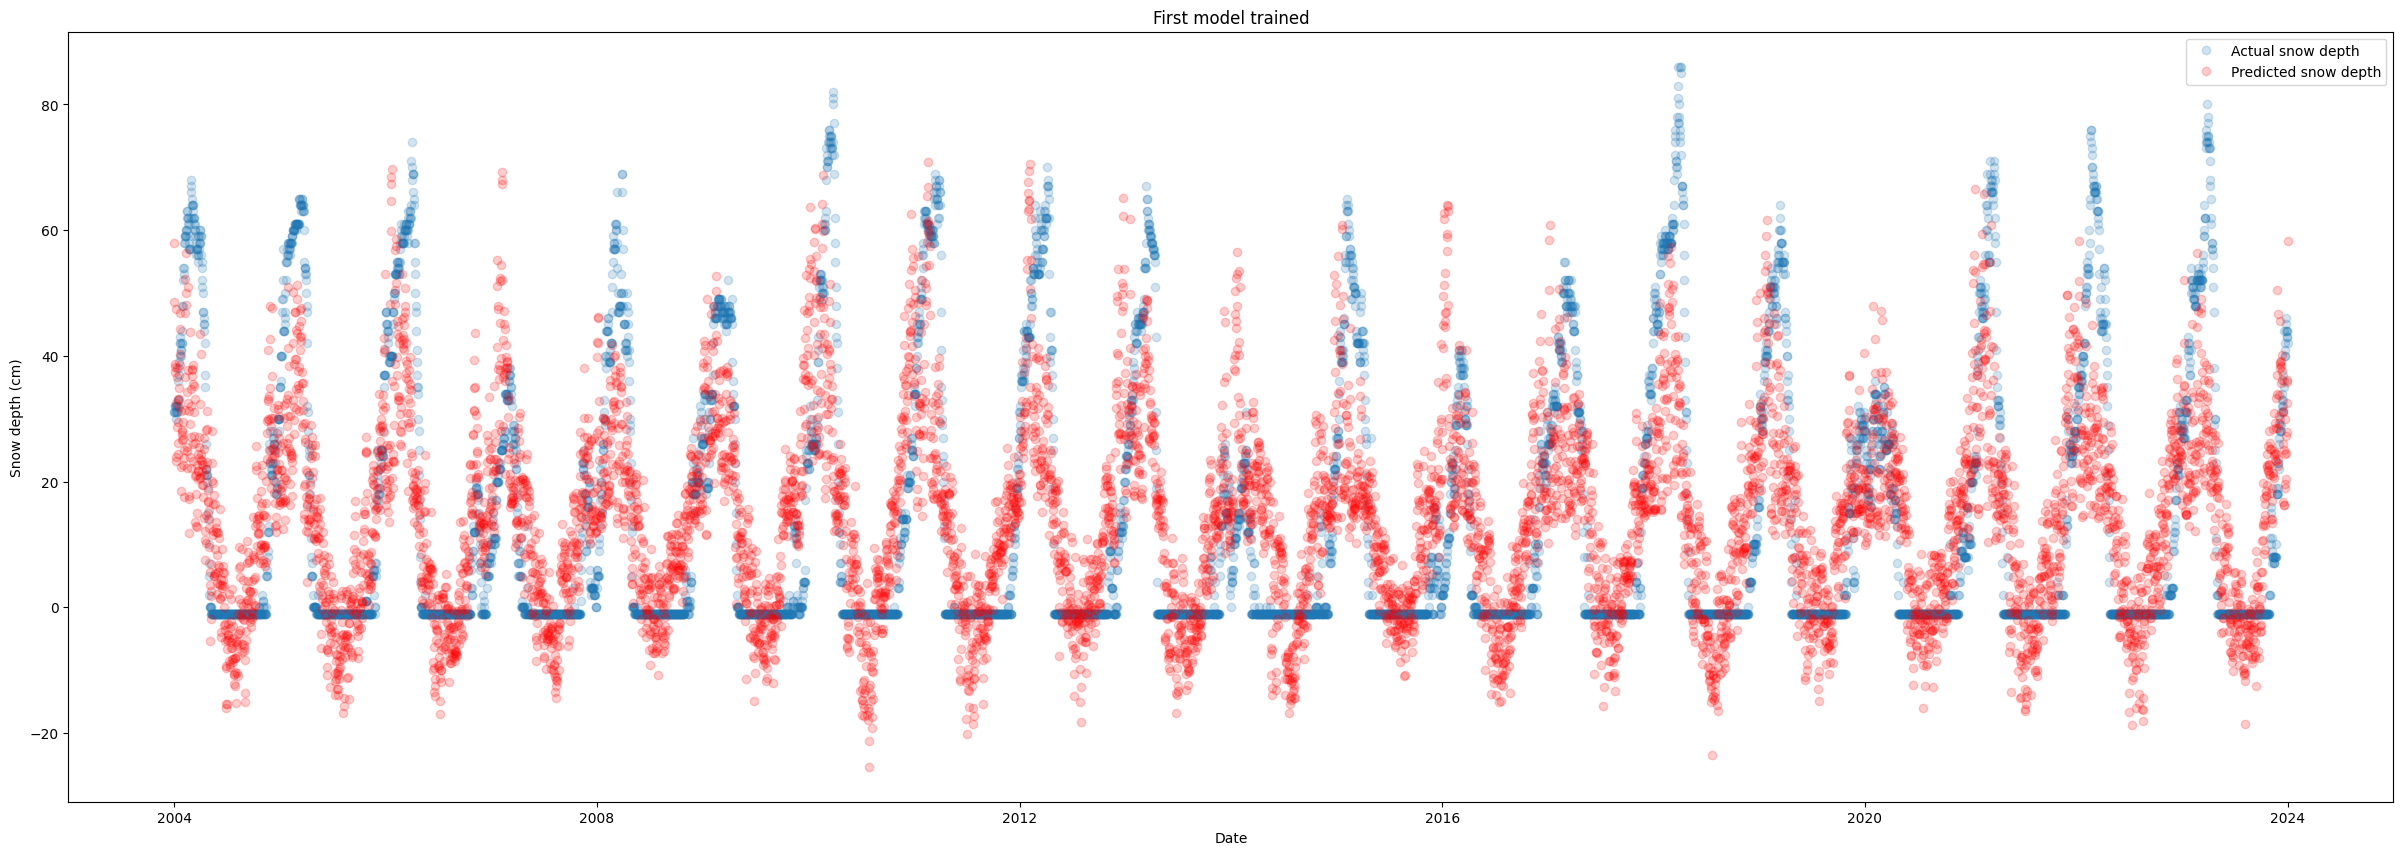

In [40]:
fig, ax = plt.subplots(figsize=(30,10))
 
%matplotlib inline
ax.plot(test_df['Date'], y_test, marker='o', ls='', alpha=0.2, label='Actual snow depth')
ax.plot(test_df['Date'], y_preds, marker='o', ls='', c='red', alpha=0.2, label='Predicted snow depth')
 
ax.set(title='First model trained',xlabel='Date', ylabel='Snow depth (cm)')
ax.legend()
plt.show()

## 2nd degree model against real values

In [41]:
# Something wrong here!!

# fig, ax = plt.subplots(figsize=(30,10))
 
# %matplotlib inline
# ax.plot(test_df['Date'], y_test, marker='o', ls='', alpha=0.2, label='Actual snow depth')
# ax.plot(test_df['Date'], y_predicted_test, marker='o', ls='', c='red', alpha=0.2, label='Predicted snow depth')
 
# ax.set(title='First model trained',xlabel='Date', ylabel='Snow depth (cm)')
# ax.legend()
# plt.show()

# 4th degree model against real values

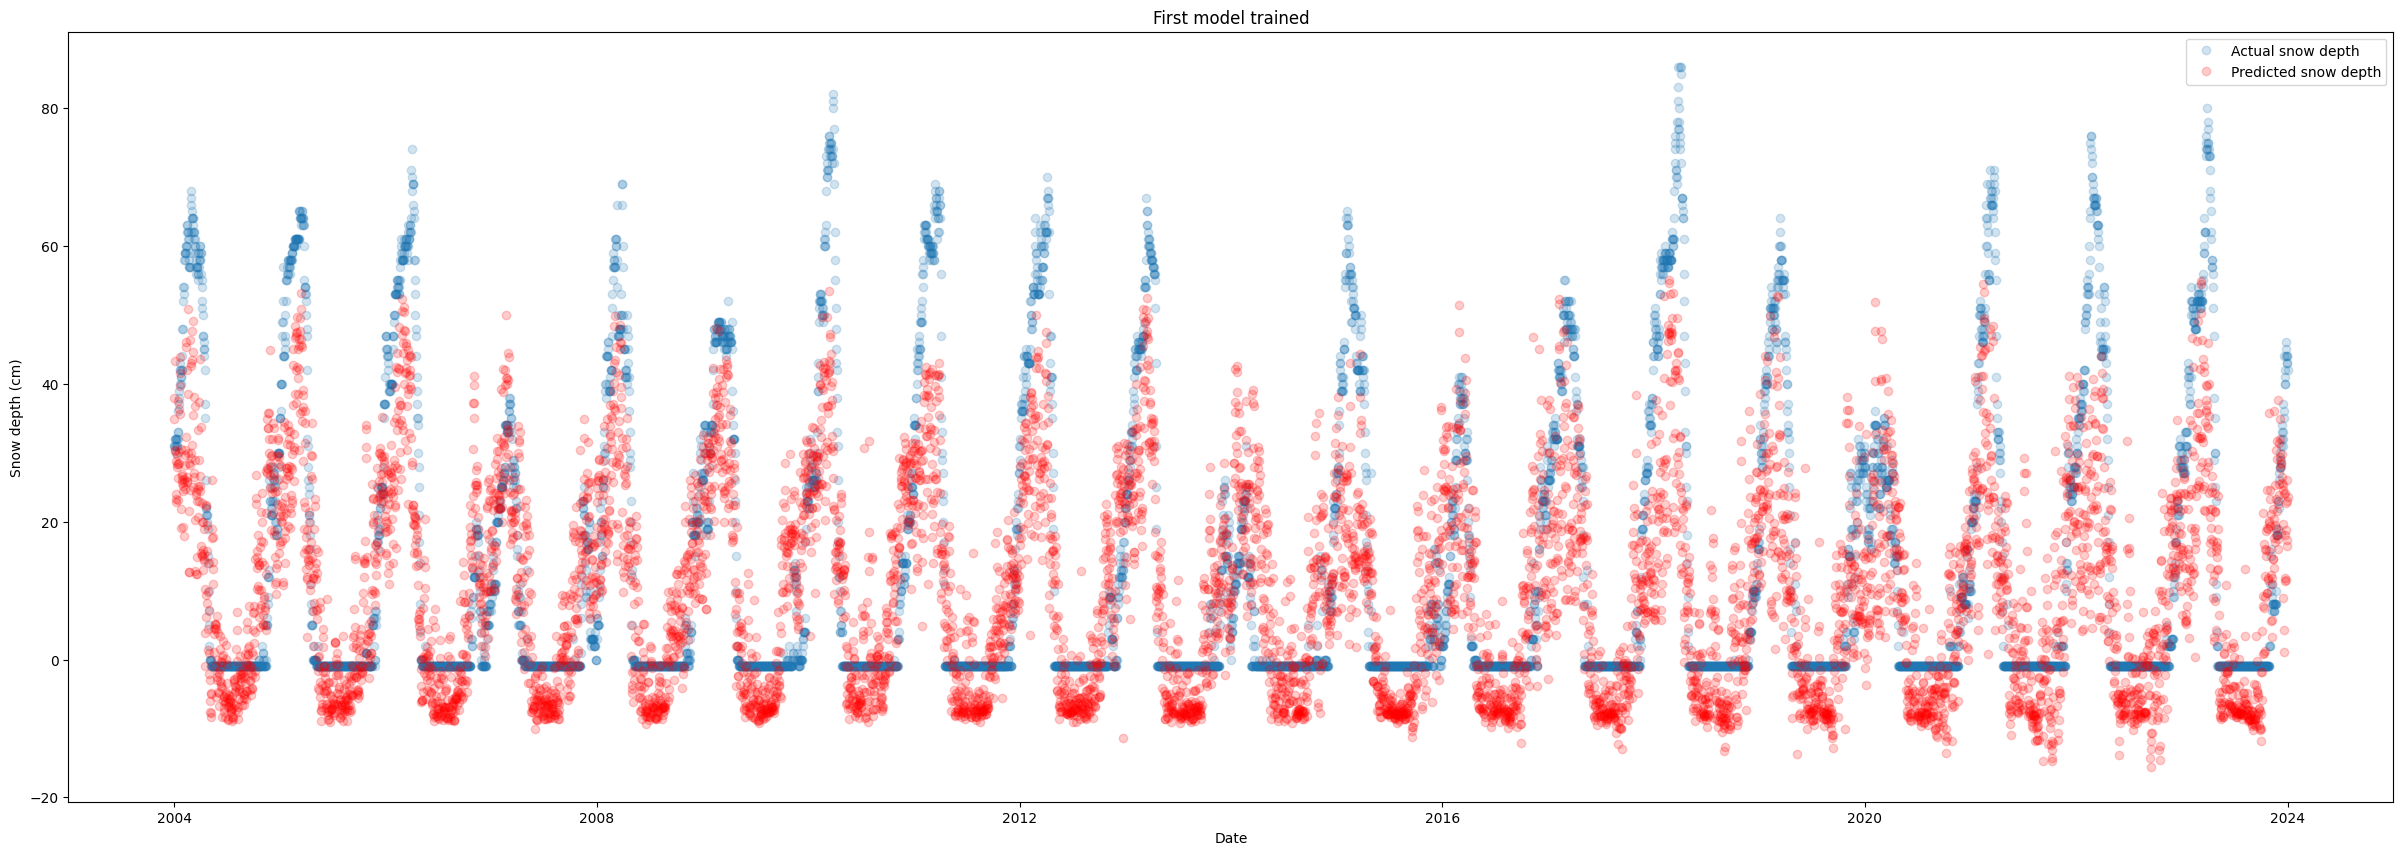

In [42]:
fig, ax = plt.subplots(figsize=(30,10))
 
%matplotlib inline
ax.plot(test_df['Date'], y_test, marker='o', ls='', alpha=0.2, label='Actual snow depth')
ax.plot(test_df['Date'], y_predicted_test4d, marker='o', ls='', c='red', alpha=0.2, label='Predicted snow depth')
 
ax.set(title='First model trained',xlabel='Date', ylabel='Snow depth (cm)')
ax.legend()
plt.show()

### 3. Save models

In [49]:
import save_print_load_as_binary as slb

slb.save_to_binary_file(model_4d,"C:\\Code\\Miniproject 2\\scripts\\presentation\\4dmodel.pkl" )


### 4. Predict

In [130]:
whole_data_df = pd.concat([training_df,test_df, prediction_df])
#whole_data_df.iloc[:,[0,4,6,7,8]].mean()
january = (whole_data_df['Date'].dt.month == 1)
february = (whole_data_df['Date'].dt.month == 2)
march = (whole_data_df['Date'].dt.month == 3)
april = (whole_data_df['Date'].dt.month == 4)
may = (whole_data_df['Date'].dt.month == 5)
june = (whole_data_df['Date'].dt.month == 6)
july = (whole_data_df['Date'].dt.month == 7)
august = (whole_data_df['Date'].dt.month == 8)
september = (whole_data_df['Date'].dt.month == 9)
october = (whole_data_df['Date'].dt.month == 10)
november = (whole_data_df['Date'].dt.month == 11)
december = (whole_data_df['Date'].dt.month == 12)

first_year = (whole_data_df['Date'].dt.year == 2004)
last_year = (whole_data_df['Date'].dt.year == 2023)

january_first_year = january & first_year
january_last_year = january & last_year

february_first_year = february & first_year
february_last_year = february & last_year

march_first_year = march & first_year
march_last_year = march & last_year

april_first_year = april & first_year
april_last_year = april & last_year

may_first_year = may & first_year
may_last_year = may & last_year

june_first_year = june & first_year
june_last_year = june & last_year

july_first_year = july & first_year
july_last_year = july & last_year

august_first_year = august & first_year
august_last_year = august & last_year

september_first_year = september & first_year
september_last_year = september & last_year

october_first_year = october & first_year
october_last_year = october & last_year

november_first_year = november & first_year
november_last_year = november & last_year

december_first_year = december & first_year
december_last_year = december & last_year




In [147]:
def daily_changes (dataframe):    
    first_year = (dataframe['Date'].dt.year == 2004)
    last_year = (dataframe['Date'].dt.year == 2023)
    # whole_data_df[last_year].iloc[:,[0,6,8]].mean()
    daily_cloud_cover_change, daily_radiation_change, daily_temperature_change = (dataframe[last_year].iloc[:,[0,6,8]].mean() - dataframe[first_year].iloc[:,[0,6,8]].mean()) / 7304
    return daily_cloud_cover_change, daily_radiation_change, daily_temperature_change

daily_changes_levi = daily_changes(levi_df)
daily_changes_ruka = daily_changes(ruka_df)
daily_changes_koli = daily_changes(koli_df)
daily_changes_tahko = daily_changes(tahko_df)
daily_changes_messila = daily_changes(messila_df)

daily_changes_koli



(-1.0808192039742912e-05, 0.0012807070704065572, 8.422324129008939e-05)

In [134]:
levi_df.head(1)

,Cloud cover [1/8],Date,Snow depth [cm],Average temperature [°C],latitude,longitude,Average radiation,Date_float,Temp_float,Snow depth_float
0,0.0,2004-01-01,39,-27.3,67.785461,24.856284,63.4,0.0,-27.3,39.0


In [175]:
first_year = (levi_df['Date'].dt.year == 2004)
last_year = (levi_df['Date'].dt.year == 2023)
# levi2023 = levi_df.copy

levi2023 = levi_df.copy()
first_year = (levi2023['Date'].dt.year == 2004)
last_year = (levi2023['Date'].dt.year == 2023)
levi2023 = levi2023[last_year]
levi2023['Date'] = levi2023['Date'] + pd.Timedelta(days=1)

#daily_cloud_cover_change, daily_radiation_change, daily_temperature_change
cloud_change = daily_changes_levi[0]
radiation_change = daily_changes_levi[1]
temperature_change = daily_changes_levi[2]

levi2023['Date24'] = levi2023['Date'] + pd.Timedelta(days=365)
for index, row in levi2023.iterrows():
    row['Cloud cover [1/8]'] = row['Cloud cover [1/8]'] + cloud_change
    cloud_change += cloud_change
    
    row['Average radiation'] = row['Average radiation'] + radiation_change
    radiation_change += radiation_change

    row['Temp_float'] = row['Temp_float'] + temperature_change
    temperature_change += temperature_change

    
levi2023

# first_year = (levi_df['Date'].dt.year == 2004)
# last_year = (levi_df['Date'].dt.year == 2023)
# levi2023 = levi_df[last_year]

# last_year = (ruka_df['Date'].dt.year == 2023)
# ruka2023 = ruka_df[last_year]

# last_year = (koli_df['Date'].dt.year == 2023)
# koli2023 = koli_df[last_year]

# last_year = (tahko_df['Date'].dt.year == 2023)
# tahko2023 = tahko_df[last_year]

# last_year = (messila_df['Date'].dt.year == 2023)
# messila2023 = messila_df[last_year]
 

,Cloud cover [1/8],Date,Snow depth [cm],Average temperature [°C],latitude,longitude,Average radiation,Date_float,Temp_float,Snow depth_float,Date24
6939,8.0,2023-01-02,45,-3.4,67.785461,24.856284,0.166667,6939.0,-3.4,45.0,2024-01-02
6940,8.0,2023-01-03,51,-2.9,67.785461,24.856284,34.200000,6940.0,-2.9,51.0,2024-01-03
6941,7.0,2023-01-04,52,-13.2,67.785461,24.856284,7.914899,6941.0,-13.2,52.0,2024-01-04
6942,8.0,2023-01-05,51,-15.4,67.785461,24.856284,6.692424,6942.0,-15.4,51.0,2024-01-05
6943,0.0,2023-01-06,50,-10.4,67.785461,24.856284,5.235101,6943.0,-10.4,50.0,2024-01-06
...,...,...,...,...,...,...,...,...,...,...,...
7299,8.0,2023-12-28,60,-4.4,67.785461,24.856284,5.996825,7299.0,-4.4,60.0,2024-12-27
7300,8.0,2023-12-29,59,-11.1,67.785461,24.856284,8.470952,7300.0,-11.1,59.0,2024-12-28
7301,8.0,2023-12-30,58,-19.9,67.785461,24.856284,6.931169,7301.0,-19.9,58.0,2024-12-29
7302,8.0,2023-12-31,57,-12.7,67.785461,24.856284,3.621587,7302.0,-12.7,57.0,2024-12-30


In [176]:
levi_df

,Cloud cover [1/8],Date,Snow depth [cm],Average temperature [°C],latitude,longitude,Average radiation,Date_float,Temp_float,Snow depth_float
0,0.0,2004-01-02,39,-27.3,67.785461,24.856284,63.400000,0.0,-27.3,39.0
1,7.0,2004-01-03,39,-30,67.785461,24.856284,65.666667,1.0,-30.0,39.0
2,7.0,2004-01-04,39,-20.5,67.785461,24.856284,54.566667,2.0,-20.5,39.0
3,8.0,2004-01-05,40,-15.2,67.785461,24.856284,4.500000,3.0,-15.2,40.0
4,8.0,2004-01-06,40,-19.3,67.785461,24.856284,3.466667,4.0,-19.3,40.0
...,...,...,...,...,...,...,...,...,...,...
7301,8.0,2023-12-29,58,-19.9,67.785461,24.856284,6.931169,7301.0,-19.9,58.0
7302,8.0,2023-12-30,57,-12.7,67.785461,24.856284,3.621587,7302.0,-12.7,57.0
7303,7.0,2023-12-31,58,-19.9,67.785461,24.856284,0.744444,7303.0,-19.9,58.0
7304,8.0,2024-01-01,58,-16.5,67.785461,24.856284,3.164127,7304.0,-16.5,58.0


In [100]:
daily_changes_messila

(2.1104465634212675e-05, 9.728131650603781e-19, 0.9502327491785323)

In [ ]:
prediction_df

In [164]:


# for index, row in ruka2023.iterrows():
#     # start_date = '2024-01-01'
#     # end_date = '2024-12-31'
#     # date_range = pd.date_range(start=start_date, end=end_date, freq='D')
#     )
# # Create DataFrame with the date range
#     df = pd.DataFrame(date_range, columns=['Date'])
# ruka2023['Date24'] = ruka2023['Date'] + pd.Timedelta(days=1)
#ruka2023['Date']=df['Date']
#ruka2023.loc[:,'Test2'] = 1
ruka2023


,Cloud cover [1/8],Date,Snow depth [cm],Average temperature [°C],latitude,longitude,Average radiation,Date_float,Temp_float,Snow depth_float
6940,8.0,2023-01-01,43,-2.9,66.165756,29.152157,34.200000,6940.0,-2.9,43.0
6941,8.0,2023-01-02,43,-6.9,66.165756,29.152157,7.914899,6941.0,-6.9,43.0
6942,9.0,2023-01-03,42,-8.7,66.165756,29.152157,6.692424,6942.0,-8.7,42.0
6943,0.0,2023-01-04,41,-10,66.165756,29.152157,5.235101,6943.0,-10.0,41.0
6944,8.0,2023-01-05,40,-10.2,66.165756,29.152157,7.469697,6944.0,-10.2,40.0
...,...,...,...,...,...,...,...,...,...,...
7300,8.0,2023-12-27,34,-8.1,66.165756,29.152157,8.470952,7300.0,-8.1,34.0
7301,8.0,2023-12-28,35,-9.9,66.165756,29.152157,6.931169,7301.0,-9.9,35.0
7302,8.0,2023-12-29,35,-10.9,66.165756,29.152157,3.621587,7302.0,-10.9,35.0
7303,7.0,2023-12-30,34,-12.7,66.165756,29.152157,0.744444,7303.0,-12.7,34.0


### 5. Estimate accuray

In [47]:
import statsmodels.api as sm
 
# Add a constant column to the features (for intercept)
#X = sm.add_constant(X)
 
# Fit the multiple linear regression model
model = sm.OLS(y_train, X_train).fit()
 
# Print the summary of the regression model which includes p-values
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:       Snow depth_float   R-squared (uncentered):                   0.607
Model:                            OLS   Adj. R-squared (uncentered):              0.607
Method:                 Least Squares   F-statistic:                              9043.
Date:                Thu, 14 Mar 2024   Prob (F-statistic):                        0.00
Time:                        10:55:28   Log-Likelihood:                     -1.2687e+05
No. Observations:               29224   AIC:                                  2.538e+05
Df Residuals:                   29219   BIC:                                  2.538e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

### 6. Repeat

# Visualizations